# Running CESM 
This is a very quick introduction to running the climate model CESM. It will guide you through the basics of running CESM. <br>
In this notebook, we will run a simulation. Later, we will look at the data you produced. 

____
## 0. Prerequisite: running a cell. 

In this tutorial, you will often hear often the expression **run a cell**. In the context of a notebook, **running a cell** refers to executing the code written within a specific cell in the notebook.
    
#### **Exercise 0**
Practice running the cell below. It means **click on the cell** and then., press **Shift-return**. <br> 
Run the same cell several times. What happens? 
    

In [ ]:
echo 'Wait for 5 seconds'
sleep 5

Wait for 5 seconds


___
## 1. Creating a CESM case

CESM experiments start with creating a **case** with a specific configuration of CESM (**compset**) and at a particular **resolution**. 

For instance, here is the command to create a CESM case called **case0** with <br>
<ul>
    <li>compset:    B1850</li>
    <li>resolution: f09_g17</li>
</ul>


![create_newcase](../../images/create_newcase.png)
<p style="text-align: center;"> Figure: Syntax of create_newcase</p>

Due to time constraints, we will create a new case by cloning an existing case in CESM. The command is `create_clone` and the result is somewhat similar to `create_newcase`.  

*IIf you plan to use CESM in the future, we recommend using the `create_newcase` command until you have a good understanding of CESM."* 

#### **Exercise 1**

Create a case (a simulation) using the `create_clone` command. The simulation you want to clone is located at: `/home/hannay/cases/case0_f09`. 

Customize your casename (each student picks a different number) and run the cell to issue the command.

In [34]:
create_clone --case  ~/cases/case3 --clone  /home/hannay/cases/case0_f09  --keepexe

ERROR: Case directory /home/hannay/cases/case0 already exists


: 1


Great!  You've created the default version of your case. Let's wait for everyone before going to step 2.
<br><br>

***

## 2. Setting up the case

The next step in running CESM is to **setup** the case. This is done by going into the case you just created and running `./case.setup`.   

The command `./case.setup` sets up files that control the model's behavior.  


#### **Exercise 2** 

Customize the cell below with your own case name. Then run the cell. This sets up the case. 

In [37]:
cd ~/cases/case3
./case.setup

Setting resource.RLIMIT_STACK to -1 from (-1, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


<br>Great!  You've now used the `case.setup` command to set up your case.  Let's wait for everyone before going to step 3.<br><br>

***

## 3. Compiling the case

CESM is written in a language called **Fortran**. Similar to English, Fortran is human readable. The computer doesn't understand Fortran. It needs to be translated in a computer-readable code (strings of 0s and 1s).   

Here is an example of fortran code

#### **Exercise 3** 

Run the cell below. This compiles the case. Be aware that this can take a few minutes.

In [27]:
qcmd -- ./case.build 

Building case in directory /home/hannay/cases/case0
sharedlib_only is False
model_only is False
Setting resource.RLIMIT_STACK to -1 from (-1, -1)
Generating component namelists as part of build
Creating component namelists
   Calling /opt/ncar/cesm/components/cam//cime_config/buildnml
     ...calling cam buildcpp to set build time options
CAM namelist copy: file1 /home/hannay/cases/case0/Buildconf/camconf/atm_in file2 /scratch/hannay/case0/run/atm_in 
   Calling /opt/ncar/cesm/components/clm//cime_config/buildnml
   Calling /opt/ncar/cesm/components/cice//cime_config/buildnml
     ...buildnml calling cice buildcpp to set build time options
   Calling /opt/ncar/cesm/components/pop//cime_config/buildnml
     ... buildnml: calling pop buildcpp to set build time options
   Calling /opt/ncar/cesm/components/mosart//cime_config/buildnml
   Running /opt/ncar/cesm/components/cism//cime_config/buildnml 
   Calling /opt/ncar/cesm/components/ww3//cime_config/buildnml
   Calling /opt/ncar/cesm/cim

<br><br>
Again, this will take a few minutes.  You'll know this is complete when you see the line:

>&nbsp;MODEL BUILD HAS FINISHED SUCCESSFULLY

If you see that, fantastic!  You've built your first CESM case!  Let's wait for everyone before going to step 4.<br><br>


***

## 4. Customizing a CESM case

**Adding some butterfly effect** 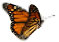
- If we submitted the simulation now, we would all get the same results.
- Let’s add a small perturbation to the temperature (butterfly effect) 
<br>

**Example of a small perturbation** 

#### **Exercise 4** 

Run the cell below. This adds some butterfly effect (a small T temperature). <br>
Each student adds a different butterfly effect. 

In [29]:
echo "pertlim = 0e-13" >> user_nl_cam

<br>
Let's wait for everyone before going to step 5.<br><br>

***

## 5. Set the length of the run

By default, cesm is set to produce 5-day simulations. Here, we modify the case to do a one-month simulation.
<br>

#### **Exercise 5** 

Run the following cell to change the length of the simulation to one month. 

In [30]:
./xmlchange STOP_OPTION=nmonths,STOP_N=1

Run the following cell to check the length of the simulation was properly set

In [31]:
./xmlquery STOP_OPTION,STOP_N


Results in group run_begin_stop_restart
	STOP_OPTION: nmonths
	STOP_N: 1


<br><br> If you see: 
> STOP_OPTION: nmonths <br>
> STOP_N: 1 <br>

Great!  You have set the case to run the model for one month.  Let's wait for everyone before going to step 6. 
<br><br>

***

## 6. Running your case

Running a case is also simple - we just issue the `case.submit` command.  This will start by checking that we have all of the necessary input data for our run, and downloading whatever is missing, and then it will perform the actual simulation - which we've configured to run for one month.


#### **Exercise 6** 

Submit your simulation. 

In [32]:
./case.submit

Setting resource.RLIMIT_STACK to -1 from (-1, -1)
Creating component namelists
   Calling /opt/ncar/cesm/components/cam//cime_config/buildnml
CAM namelist copy: file1 /home/hannay/cases/case0/Buildconf/camconf/atm_in file2 /scratch/hannay/case0/run/atm_in 
   Calling /opt/ncar/cesm/components/clm//cime_config/buildnml
   Calling /opt/ncar/cesm/components/cice//cime_config/buildnml
   Calling /opt/ncar/cesm/components/pop//cime_config/buildnml
   Calling /opt/ncar/cesm/components/mosart//cime_config/buildnml
   Running /opt/ncar/cesm/components/cism//cime_config/buildnml 
   Calling /opt/ncar/cesm/components/ww3//cime_config/buildnml
   Calling /opt/ncar/cesm/cime/src/components/stub_comps/sesp/cime_config/buildnml
   Calling /opt/ncar/cesm/cime/src/drivers/mct/cime_config/buildnml
Finished creating component namelists
Checking that inputdata is available as part of case submission
Setting resource.RLIMIT_STACK to -1 from (-1, -1)
Loading input file list: 'Buildconf/cam.input_data_list'

**Check the job is running** 

When you submit a simulation, it will be waiting in the computer until there is enough computer resources. <br> The command `squeue` allows you to make sure your simulation is in the queue or running.

In [33]:
squeue -u $USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
                19   compute run.case   hannay CF       0:11      1 compute-dy-build-1
                20   compute st_archi   hannay PD       0:00      1 (Dependency)


<br><br>When this step finishes, the run will complete, then the 'archive' script will execute.  You will see a few warning messages about 'No such variable' - these are normal, and can be ignored.  The final lines should look like:

>Submitted job case.run with id None<br>
Submitted job case.st_archive with id None


If you see those, congratulations!  You've run your first case -- there's a *lot* of text shown above, and we'll cover it in more detail in another tutorial, and more information can also be found in the [documentation](https://escomp.github.io/CESM/versions/cesm2.2/html/quickstart.html#run-the-case).<br><br>

***